## Tarefas
- qual é a epoca de maior movimento? (done)
- qual melhor época do ano para se fazer reserva? (done)
- quanto elas estão dispostas a pagar? (done)
- preço médio dos quartos? (done)
- dia da semana que mais fazem check-in? (Só tem informação de check-out)
- quantos dias que costumam ficar? comparar essa quantidade entre os hoteis (done)
- duração ideal da estadia para obter a melhor taxa diária?
- De onde vêm a maior parte dosvisitantes?
- se chegam de carro e precisam de estacionamento ou se vão de onibus/avião? (é possivel saber com esses dados?)

https://www.kaggle.com/jessemostipak/hotel-booking-demand

# Colunas

#### hotel
- Hotel (H1 = Resort ou H2 = Hotel na cidade)
#### is_canceled
- Valor indicando se a reserva foi cancelada (1) ou não (0)
#### lead_time
- Número de dias decorridos entre a data de entrada da reserva no PMS e a data de chegada
#### arrival_date_year
- Ano da data de chegada
#### arrival_date_month
- Mês da data de chegada
#### arrival_date_week_number
- Número da semana do ano para a data de chegada
#### arrival_date_day_of_month
- dia da data de chegada
#### stay_in_weekend_nights
- Número de noites de fim de semana (sábado ou domingo) em que o hóspede ficou ou reservou para ficar no hotel
#### stay_in_week_nights
- Número de noites da semana (de segunda a sexta-feira) em que o hóspede ficou ou reservou para ficar no hotel
#### adults
- Número de Adultos
#### children
- número de filhos
#### babies
- Número de bebês
#### meal
- Tipo de refeição reservada. As categorias são apresentadas em pacotes padrão de refeições de hospitalidade: Indefinido / SC - sem pacote de refeições; BB - Alojamento e café da manhã; HB - Meia pensão (café da manhã e outra refeição - geralmente jantar); FB - Pensão completa (café da manhã, almoço e jantar)
#### country
- País de origem. As categorias são representadas no formato ISO 3155–3: 2013
#### market_segment
- Designação do segmento de mercado. Nas categorias, o termo "TA" significa "agentes de viagens" e "TO" significa "operadores turísticos"
#### distribution_channel
- Canal de distribuição de reservas. O termo "TA" significa "agentes de viagens" e "TO" significa "operadores turísticos"
#### is_repeated_guest
- Valor indicando se o nome da reserva era de um hóspede repetido (1) ou não (0)
#### previous_cancellations
- Número de reservas anteriores que foram canceladas pelo cliente antes da reserva atual
#### previous_bookings_not_canceled
- Número de reservas anteriores não canceladas pelo cliente antes da reserva atual
#### Reserved_room_type
- Código do tipo de quarto reservado. O código é apresentado em vez da designação por razões de anonimato.
#### assign_room_type
- Código para o tipo de quarto atribuído à reserva. Às vezes, o tipo de quarto atribuído difere do tipo de quarto reservado devido a razões de operação do hotel (por exemplo, reservas em excesso) ou por solicitação do cliente. O código é apresentado em vez da designação por razões de anonimato.
#### booking_changes
- Número de alterações / alterações feitas na reserva desde o momento em que a reserva foi inserida no PMS até o momento do check-in ou cancelamento
#### deposit_type
- Indicação se o cliente fez um depósito para garantir a reserva. Essa variável pode assumir três categorias: Nenhum depósito - nenhum depósito foi feito; Não reembolso - foi feito um depósito no valor do custo total da estadia; Reembolsável - foi feito um depósito com um valor abaixo do custo total da estadia.
#### agent
- ID da agência de viagens que fez a reserva
#### company
- ID da empresa / entidade que fez a reserva ou responsável pelo pagamento da reserva. O ID é apresentado em vez da designação por razões de anonimato
#### days_in_waiting_list
- Número de dias em que a reserva estava na lista de espera antes de ser confirmada ao cliente
#### customer_type
- Tipo de reserva, assumindo uma das quatro categorias: Contract - quando a reserva possui uma atribuição ou outro tipo de contrato associado a ela; Group - quando a reserva está associada a um grupo; Transient - quando a reserva não faz parte de um grupo ou contrato e não está associado a outra reserva transitória; Transient-party - quando a reserva é transitória, mas está associada a pelo menos outra reserva transitória
#### adr
- Taxa diária média, conforme definida pela divisão da soma de todas as transações de hospedagem pelo número total de noites de permanência
#### required_car_parking_spaces
- Número de vagas de estacionamento exigidas pelo cliente
#### total_of_special_requests
- Número de pedidos especiais feitos pelo cliente (por exemplo, cama de solteiro ou andar alto)
#### reservation_status
- Último status da reserva, assumindo uma de três categorias: Cancelado - a reserva foi cancelada pelo cliente; Check-Out - o cliente fez o check-in, mas já partiu; No-Show - o cliente não fez o check-in e informou o hotel do motivo
#### reservation_status_date
- Data em que o último status foi definido. Essa variável pode ser usada em conjunto com o ReservationStatus para entender quando a reserva foi cancelada ou quando o cliente fez o check-out do hotel.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
import pycountry as pc

%matplotlib inline

In [2]:
pd.set_option('display.max_rows',101)

In [3]:
df = pd.read_csv("hotel_bookings.csv")

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#verificando os valores do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

É possivel observar que as Colunas children, country, company e agent contem valores missing

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Limpeza e tratamento dos dados

In [7]:
#verificando os valores null
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
#Os métodos abaixo preenchem os valones NaN com 0 caso na mesma liinha da reserva tenha valores NaN em agent e company
#indicando que a reserva foi feita sem uma agência de viagens e sem ser pela empresa

#Agent
#método que gera verifica em cada linha se o valor é nulo nas duas colunas e caso sejam, altera o valor para 0 no agente
#caso não sejam nulos ele retorna o valor antigo e ao final devolve uma serie
def fill_ag(agent,company): 
    listagem = []
    for i in range(len(agent)):
        if((np.isnan(agent[i]) == True) and (np.isnan(company[i]) == True)):
            listagem.append(0)
        else:
            listagem.append(agent[i])
    return pd.Series(listagem)

#Company
#método que gera verifica em cada linha se o valor é 0 em agent e nulo na coluna company caso sejam, altera o valor para 0
# em company, caso não sejam 0 e nulo ele retorna o valor antigo e ao final devolve uma serie
def fill_cp(agent,company):   
    listagem = []
    for i in range(len(company)):
        if((agent[i] == 0) and (np.isnan(company[i]) == True)):
            listagem.append(0)
        else:
            listagem.append(company[i])
    return pd.Series(listagem)

In [9]:
#Preenchendo os valores de agent e company que são nulos 

#objeto que pega o tempo atual em segundos e grava na varriavel inicio
inicio = time.time()
df['agent'] = fill_ag(df['agent'],df['company'])
df['company'] = fill_cp(df['agent'],df['company'])
#objeto que pega o tempo atual em segundos e grava na varriavel fim
fim = time.time()

#imprime a diferença de tempo emtre o inicio e fim
#print(fim - inicio)

#Preenchendo os valores que sobraram em agent e company
#3333 = viajou com empresa
df['agent'].fillna(3333,inplace=True)

#1111 = viajou com agencia
df['company'].fillna(1111,inplace=True)

#Apagando os dados de children que são nulos
df['children'].fillna(0,inplace=True)

#Apagando os dados de country que são nulos
df['country'].fillna('Desconhecido',inplace=True)
#Canadá foi preenchido errado
df['country'].replace('CN','CAN',inplace=True)

#Crio uma lista contendo todos os indices de adultos,crianças e bebes com valor igual a 0
visitantes = list(df.loc[df["adults"]+ df["children"]+ df["babies"]==0].index)

#Dropo esses valores zerados
df.drop(df.index[visitantes],inplace=True)

#de acordo com a descrição das colunas Undefined e SC são a mesma informação
df['meal'].replace("Undefined", "SC", inplace=True)

#Corrigindo um outlier
df['adr'].replace(5400,df['adr'].median(),inplace=True)

#Traduzindo o nome dos meses
df['arrival_date_month'].replace(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
           ['Janeiro','Fevereiro','Marco','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro', 'Novembro','Dezembro'],inplace=True)

#Criando uma lista com os meses ordenados
ordered_months = ['Janeiro','Fevereiro','Marco','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro', 'Novembro','Dezembro']
#Gravando os meses categorizados, com isso será possível ver os meses na ordem
df["arrival_date_month"] = pd.Categorical(df["arrival_date_month"], categories=ordered_months, ordered=True)

# Análise Exploratória
<hr>

### Qual é a epoca de maior movimento?

In [10]:
#Setando um fundo branco nos gráficos
sns.set_style("whitegrid")

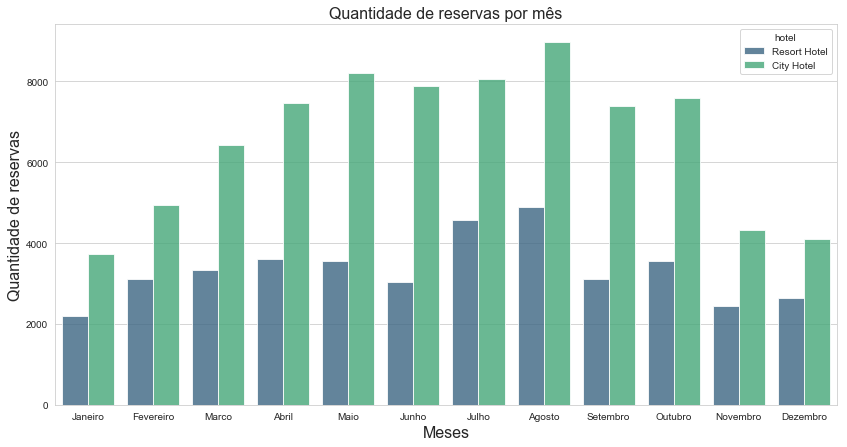

In [11]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['arrival_date_month'],palette='viridis',alpha=0.8,hue=df['hotel'])

plt.rcParams['legend.fontsize'] = 13
plt.ylabel("Quantidade de reservas",fontsize=16)
plt.xlabel("Meses",fontsize=16)
plt.title("Quantidade de reservas por mês",fontsize=16)
plt.show()

Os meses com maior número de visitantes no resort são os meses de verão, julho e agosto, um padrão parecido acontece no hotel, o pico no número de visitantes também é em agosto. É possível observar que em ambos o movimento começa a apresentar crescimento em fevereiro e diminui em setembro.


### Qual melhor época do ano para se fazer reserva? 
> Revisar este trecho


Se tratando do hotel em <strong>Lisboa</strong>, os meses mais frequentados são abril, maio, junho, julho, agosto e setembro por conta da primavera e verão, porém mesmo sendo uma bela cidade para se visitar no inverno o número de hospedes no hotel diminui consideravelmente comparando com os meses mais quentes. <br><br>Já <strong>Algarve</strong> tem como pico os meses de julho e agosto, por ser uma cidade litorânea suas praias atraem mutos visitantes nessa época, no restante do ano, com exceção de novembro a janeiro que são os meses mais frios o resort mantém uma média de 3300 visitantes por mês.

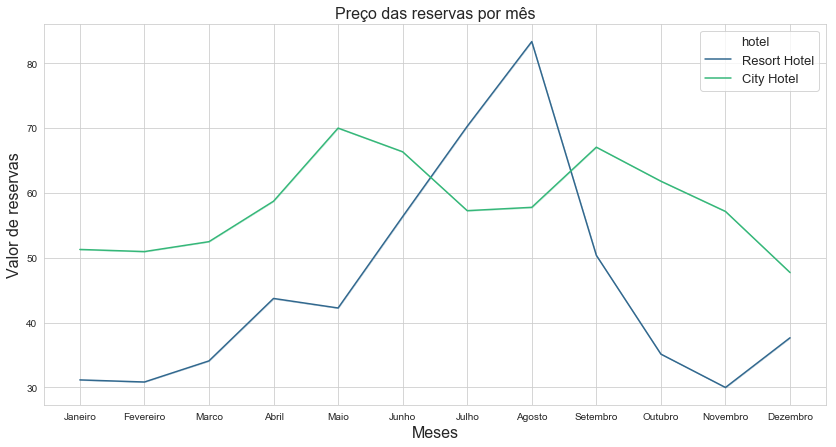

In [12]:
#Criação de uma coluna com a média das diarias por pessoa
df['adr_individual'] = df['adr'] / (df['adults' ]+ df['children'])

#Pegando os quartos que não foram cancelados
res = df[df['is_canceled'] == 0]
plt.figure(figsize=(14,7))
sns.lineplot(x='arrival_date_month',y='adr_individual',data=res,hue ='hotel',ci=0,palette='viridis')

plt.rcParams['legend.fontsize'] = 13
plt.ylabel("Valor de reservas",fontsize=16)
plt.xlabel("Meses",fontsize=16)
plt.title("Preço das reservas por mês",fontsize=16)
plt.show()

Em relação ao preço das diárias, o valor por pessoa hospedada no resort começa a subir no mês de maio que é considerado média temporada na região de <strong>Algarve</strong> e só volta a cair no fim da alta temporada, meses como maio e setembro são considerados bons para se visitar a cidade pois nesses meses é possivel aproveitar o calor sem enfrentar lugares muito movimentados economizando um pouco maisnas diárias.

Em <strong>Lisboa</strong> ocorre o contrario, meses como maio e setembro acabam tendo uma alta no preço e apresentando uma queda nos outros meses de calor, tendo julho e agosto com as diarias mais baixas (Curiosamente os meses mais quentes)

Nos dois hoteis analisados é exibido o mesmo padrão, os preços são mais altos nos meses quentes e caem abruptamente nos meses mais frios

### Quanto os hospedes estão costumam gastar com as diarias?

In [13]:
#Selecionando apenas clientes que não cancelaram e se hospedaram no resort
rh = df[df['hotel'] == 'Resort Hotel']
rh = rh[rh['is_canceled'] == 0]
#Selecionando apenas clientes que não cancelaram e se hospedaram no hotel
ch = df[df['hotel'] == 'City Hotel']
ch =ch[ch['is_canceled'] == 0]

In [14]:
print('\nOs hóspedes do Resort em Algarve costumam pagar em média {:.2f}€ por pessoa e por noite.'.format(rh['adr_individual'].mean()))
print('Já os hóspedes do Hotel localizado em Lisboa costumam pagar {:.2f}€ por pessoa e por noite.'.format(ch['adr_individual'].mean()))


Os hóspedes do Resort em Algarve costumam pagar em média 47.49€ por pessoa e por noite.
Já os hóspedes do Hotel localizado em Lisboa costumam pagar 59.27€ por pessoa e por noite.


### Preço médio dos quartos?

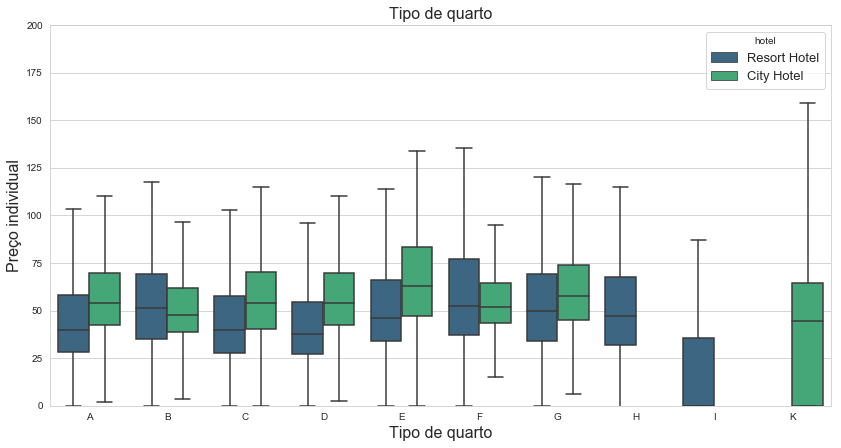

In [15]:
pmedio_quartos = df[df['is_canceled'] == 0]
plt.figure(figsize=(14,7))
sns.boxplot(x=pmedio_quartos['assigned_room_type'].sort_values(),y='adr_individual',
            data=pmedio_quartos,fliersize=0,hue='hotel',palette='viridis')
plt.ylim(0,200)

plt.rcParams['legend.fontsize'] = 13

plt.title("Tipo de quarto",fontsize=16)
plt.ylabel('Preço individual',fontsize=16)
plt.xlabel('Tipo de quarto',fontsize=16)
plt.show()

O gráfico acima mostra a distribuição dos preços por quarto. Os quartos foram distribuidos aleatoriamente para manter o anonimato, então é possivel que tenha quartos no resort e no hotel com a mesma letra porém com preços diferentes

In [16]:
media_quarto_rh = df['adr_individual'].groupby(rh['assigned_room_type']).mean().reset_index()
media_quarto_rh.rename(columns={'assigned_room_type':'Quarto','adr_individual':'Preco'},inplace=True)
media_quarto_rh.sort_values(by='Preco')

,Quarto,Preco
8,I,20.387745
3,D,44.567274
2,C,45.392404
0,A,46.111934
7,H,50.723876
4,E,53.031747
6,G,54.811204
1,B,55.923589
5,F,59.083839


Esta listagem mostra o preço médio dos quartos no Resort

In [17]:
media_quarto_ch = df['adr_individual'].groupby(ch['assigned_room_type']).mean().reset_index()
media_quarto_ch.rename(columns={'assigned_room_type':'Quarto','adr_individual':'Preco'},inplace=True)
media_quarto_ch.sort_values(by='Preco')

,Quarto,Preco
7,K,42.317363
1,B,54.204633
5,F,57.867544
3,D,58.983686
2,C,59.102238
0,A,59.123993
6,G,63.261562
4,E,70.166400


Já nesta outra listagem podemops ver o preço médio dos quartos do hotel

### Quantos dias que costumam se hospedar nos hoteis? 

In [18]:
#Método para gerar uma tabela de frequencias
def tabela_de_frequencias(ch):
    tf = ch.value_counts().sort_index().reset_index()
    tf.rename(columns={'index':'dias','dias_hospedados':'fi'},inplace=True)
    tf['fri'] = np.round(ch.value_counts() / len(ch) * 100,2)
    tf['Fi'] = tf['fi'].cumsum()
    tf['Fri'] = np.round((tf['fi'] / len(ch)) * 100,2)
    return tf.sort_values(by='fri',ascending=False)

#Criando uma coluna somando o dia da semana com os finais de semana
rh['dias_hospedados'] = rh['stays_in_week_nights'] + rh['stays_in_weekend_nights']
ch['dias_hospedados'] = ch['stays_in_week_nights'] + ch['stays_in_weekend_nights']

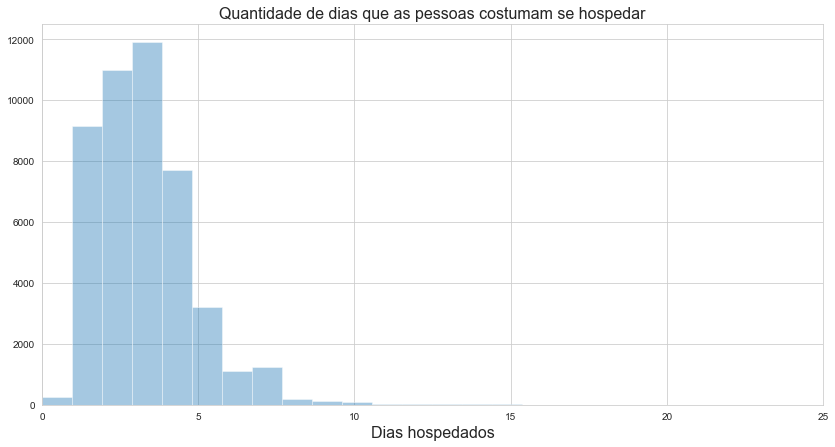

Neste histograma é possível observar que cerca de 70% dos hospedes costumam ficar hospedados no hotel de 1 a 3 dias, 
na tabela abaixo temos o percentual de hospedes que costumam ficar hospedados nesses dias.


,dias,fri
3,3,25.80
2,2,23.83
1,1,19.87
4,4,16.70
5,5,6.97
7,7,2.70
6,6,2.41
0,0,0.54
8,8,0.44
9,9,0.26


In [19]:
#City Hotel 
plt.figure(figsize=(14,7))
sns.distplot(ch['dias_hospedados'],bins=50,kde=False)
plt.title("Quantidade de dias que as pessoas costumam se hospedar",fontsize=16)
plt.xlabel('Dias hospedados',fontsize=16)
plt.xlim(0,25)
plt.show()

print('Neste histograma é possível observar que cerca de 70% dos hospedes costumam ficar hospedados no hotel de 1 a 3 dias,',
     '\nna tabela abaixo temos o percentual de hospedes que costumam ficar hospedados nesses dias.')

tabela_de_frequencias_city_hotel = tabela_de_frequencias(ch['dias_hospedados'])
tabela_de_frequencias_city_hotel[['dias','fri']].head(10)

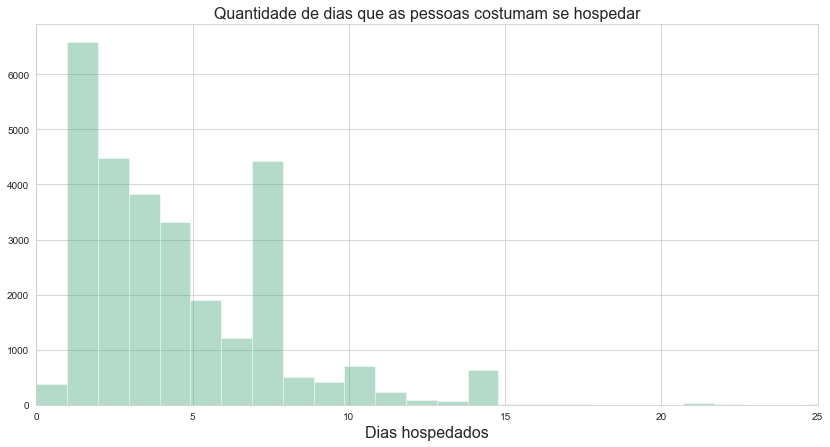

No Resort 51% dos visitantes ficam hospedados de 1 a 3 dias, e 15% dos hospedes costumam se hospedar por uma semana 
Abaixo também é possível observar a tabela com o percentual de dias que os visitantes costumam se hospedar.


,dias,fri
1,1,22.74
2,2,15.51
7,7,15.33
3,3,13.23
4,4,11.48
5,5,6.56
6,6,4.17
10,10,2.42
14,14,2.18
8,8,1.76


In [20]:
#resort Hotel 
plt.figure(figsize=(14,7))
sns.distplot(rh['dias_hospedados'],bins=70,kde=False,color='#45a778')
plt.title("Quantidade de dias que as pessoas costumam se hospedar",fontsize=16)
plt.xlabel('Dias hospedados',fontsize=16)
plt.xlim(0,25)
plt.show()

print('No Resort 51% dos visitantes ficam hospedados de 1 a 3 dias, e 15% dos hospedes costumam se hospedar por uma semana',
     '\nAbaixo também é possível observar a tabela com o percentual de dias que os visitantes costumam se hospedar.')

tabela_de_frequencias_resort_hotel = tabela_de_frequencias(rh['dias_hospedados'])
tabela_de_frequencias_resort_hotel[['dias','fri']].head(10)

### De onde vêm a maior parte dos visitantes?

In [21]:
#Método para retornar uma serie com o nome dos países
def set_pais(col):
    listagem = []
    for i in range(len(col)):
        try:
            var = pc.countries.get(alpha_3=col.iloc[i]).name
            listagem.append(var)
        except:
            listagem.append('Desconhecido')
    return pd.Series(listagem)

In [22]:
paises = df['country'].value_counts()
paises = paises.reset_index()
paises.rename(columns={'index':'País','country':'visitantes'},inplace=True)

paises['percentual'] = np.round((paises['visitantes'] / paises['visitantes'].sum()) * 100,2)
paises['Nome'] = set_pais(paises['País'])

paises.head(10)

,País,visitantes,percentual,Nome
0,PRT,48483,40.67,Portugal
1,GBR,12120,10.17,United Kingdom
2,FRA,10401,8.72,France
3,ESP,8560,7.18,Spain
4,DEU,7285,6.11,Germany
5,ITA,3761,3.15,Italy
6,IRL,3374,2.83,Ireland
7,BEL,2342,1.96,Belgium
8,BRA,2222,1.86,Brazil
9,NLD,2103,1.76,Netherlands


A maior parte das reservas vêm dos países europeus vizinhos de Portugal. 40% das reservas são feitas por Portugueses.

In [23]:
#px.scatter_geo(paises, locations="País",locationmode='ISO-3', color="País",hover_name="País", size="visitantes",title="<b>Países de onde vem a maior parte dos Visitantes</b>").show()

<img src="map.png">

#### Correlação entre os dados

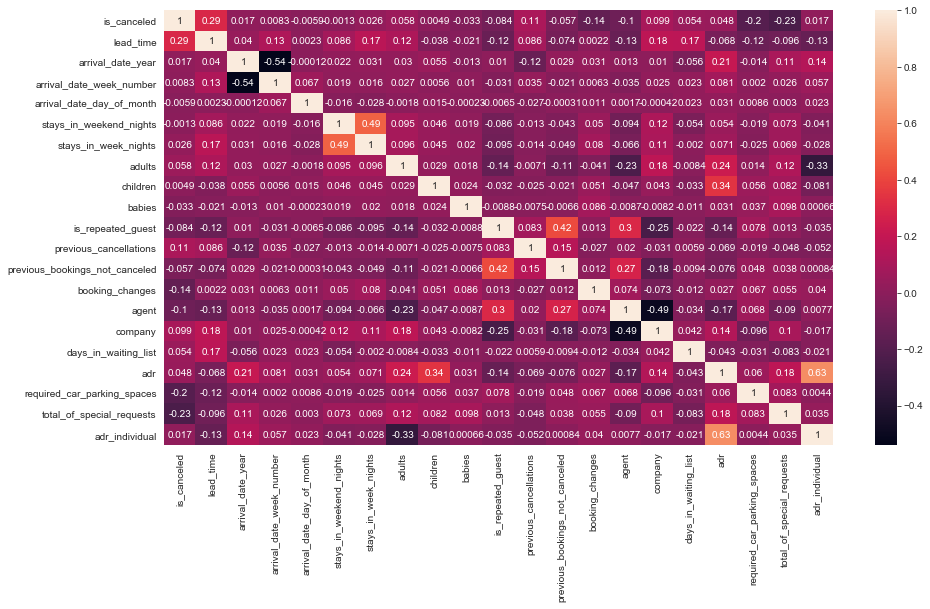

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

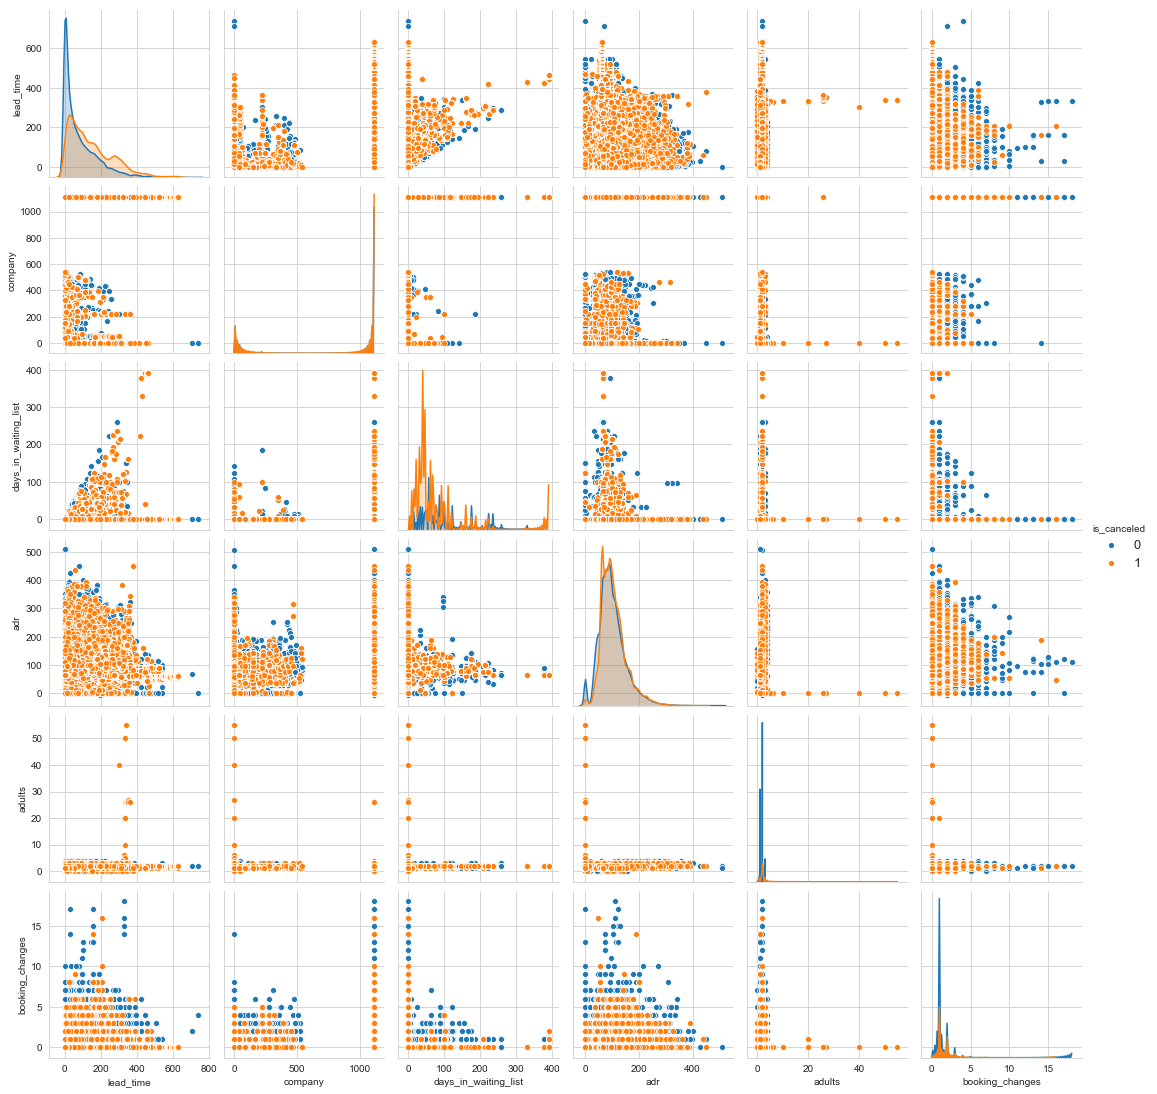

In [78]:
quant = df[['is_canceled','lead_time','company','days_in_waiting_list','adr','adults','booking_changes']]
sns.pairplot(quant,hue='is_canceled')

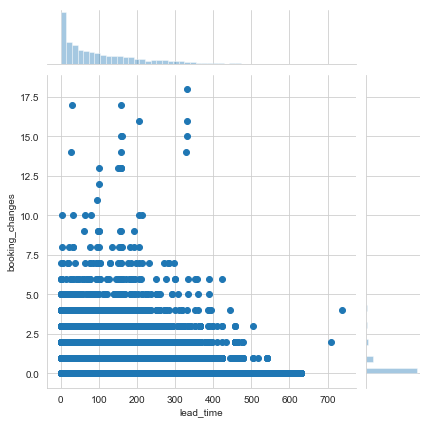

In [72]:
sns.jointplot(x='lead_time',y='booking_changes',data=df,kind='scatter')

# Algoritmos